In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4195426410371176540
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 3072807556337272406
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3802967964706386920
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10913290650
locality {
  bus_id: 1
  links {
    link {
      device_id: 1
      type: "StreamExecutor"
      strength: 1
    }
    link {
      device_id: 2
      type: "StreamExecutor"
      strength: 1
    }
    link {
      device_id: 3
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 11878410496033010354
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
, name: "/device:GPU:1"
device_type: "GPU"
me

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2,3"

In [3]:
cd /media/datastorage/Phong/cifar10/cifar-10-batches-py/

/media/datastorage/Phong/cifar10/cifar-10-batches-py


In [ ]:
ls -l

In [ ]:
cd data_batch_1

In [ ]:
ls -l

In [0]:
"""
make_cifar10.py: Create training data from raw CIFAR-10 batches.
"""

# import cPickle as pkl
import pickle as pkl
import glob
import os

import numpy as np
from skimage.io import imsave


PIXELS_DIR = "pixel_data"
LABEL_FILE = "labels.txt"


def unpack_file(fname):
    """
        Unpacks a CIFAR-10 file.
    """

    with open(fname, "r") as f:
        result = pkl.load(f)

    return result


def save_as_image(img_flat, fname):
    """
        Saves a data blob as an image file.
    """

    # consecutive 1024 entries store color channels of 32x32 image 
    img_R = img_flat[0:1024].reshape((32, 32))
    img_G = img_flat[1024:2048].reshape((32, 32))
    img_B = img_flat[2048:3072].reshape((32, 32))
    img = np.dstack((img_R, img_G, img_B))

    imsave(os.path.join(PIXELS_DIR, fname), img)


def main():
    """
        Entry point.
    """

    labels = {}

    # use "data_batch_*" for just the training set
    for fname in glob.glob("*_batch*"):
        print(fname)
        data = unpack_file(fname)

#         for i in range(10000):
#             img_flat = data["data"][i]
#             fname = data["filenames"][i]
#             label = data["labels"][i]

#             # save the image and store the label
#             save_as_image(img_flat, fname)
#             labels[fname] = label

#     # write out labels file
#     with open(LABEL_FILE, "w") as f:
#         for (fname, label) in labels.iteritems():
#             f.write("{0} {1}\n".format(fname, label))


if __name__ == "__main__":
    main()

In [0]:
cd ..

/content


In [0]:
ls -l

total 166512
drwxr-xr-x 2 2156 1103      4096 Jun  4  2009 cifar-10-batches-py/
-rw-r--r-- 1 root root 170498071 Jun  4  2009 cifar-10-python.tar.gz
drwxr-xr-x 1 root root      4096 Aug 27 16:17 sample_data/


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt
from six.moves import cPickle as pickle
import os
import platform
from subprocess import check_output
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

%matplotlib inline


img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)

def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))

def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000,3072)
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=10000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cifar-10-batches-py/'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    x_train = X_train.astype('float32')
    x_test = X_test.astype('float32')

    x_train /= 255
    x_test /= 255

    return x_train, y_train, X_val, y_val, x_test, y_test

# Invoke the above function to get our data.
x_train, y_train, x_val, y_val, x_test, y_test = get_CIFAR10_data()


print('Train data shape: ', x_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', x_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', x_test.shape)
print('Test labels shape: ', y_test.shape)

In [ ]:
ls -l

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%cp gdrive/My\ Drive/cifar_train.zip cifar_train.zip 
%cp gdrive/My\ Drive/cifar_test.zip cifar_test.zip 

In [3]:
!unzip cifar_train.zip
!unzip cifar_test.zip

Archive:  cifar_train.zip
   creating: train/
   creating: train/5/
 extracting: train/5/english_toy_spaniel_s_000856.png  
 extracting: train/5/feist_s_000359.png  
 extracting: train/5/chihuahua_s_000967.png  
 extracting: train/5/domestic_dog_s_000300.png  
 extracting: train/5/maltese_dog_s_000418.png  
 extracting: train/5/pekingese_s_001812.png  
 extracting: train/5/maltese_dog_s_001102.png  
 extracting: train/5/puppy_s_001168.png  
 extracting: train/5/king_charles_spaniel_s_000298.png  
 extracting: train/5/puppy_s_002335.png  
 extracting: train/5/domestic_dog_s_000229.png  
 extracting: train/5/maltese_s_001798.png  
 extracting: train/5/mutt_s_000894.png  
 extracting: train/5/maltese_s_001988.png  
 extracting: train/5/puppy_s_000261.png  
 extracting: train/5/blenheim_spaniel_s_001169.png  
 extracting: train/5/maltese_s_001867.png  
 extracting: train/5/puppy_s_000667.png  
 extracting: train/5/maltese_dog_s_000830.png  
 extracting: train/5/peke_s_000005.png  
 extract

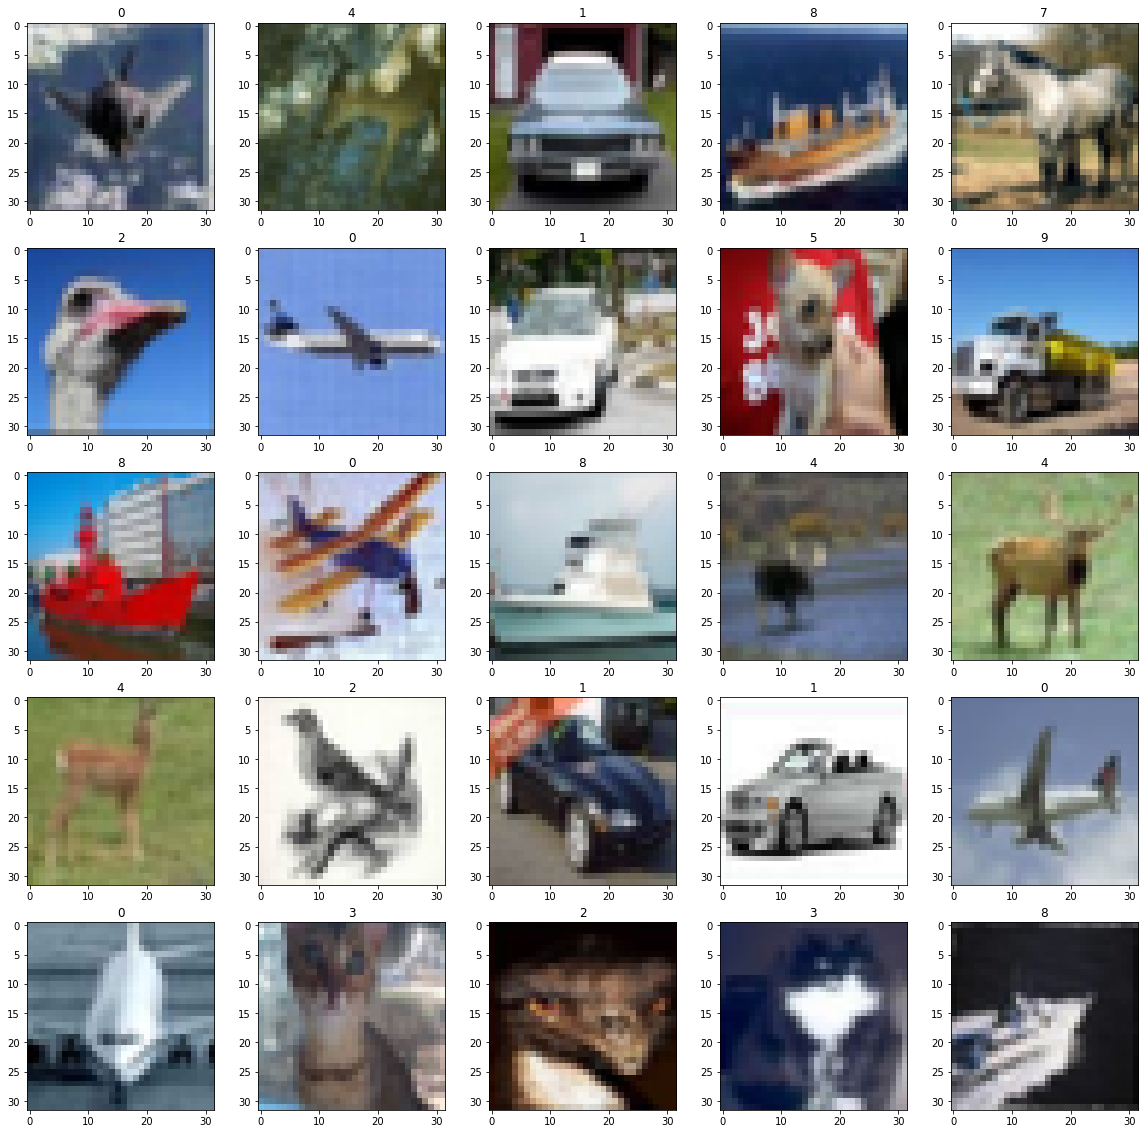

In [0]:
#Images/n02105855-Shetland_sheepdog/n02105855_9415.jpg

import glob
import os

import numpy as np
from matplotlib.image import imread
%matplotlib inline
import matplotlib.pyplot as plt

# get image parts
def get_image_parts(image_path):
    """Given a full path to an image, return its parts."""
    parts = image_path.split(os.path.sep)
    #print(parts)
    filename = parts[2]
    filename_no_ext = filename.split('.')[0]
    classname = parts[1]
    train_or_test = parts[0]
    
    return train_or_test, classname, filename_no_ext, filename
    
    
sample_images = list(glob.glob(os.path.join('train/', '*/*'), recursive=True))
np.random.seed(42)
rand_imgs = np.random.choice(sample_images, size=5*5)
fig, axarr = plt.subplots(5, 5, figsize=(20, 20))

for i, rand_img in enumerate(rand_imgs):
    train_or_test, classname, filename_no_ext, filename = get_image_parts(rand_img)
    
    j = i // 5
    k = i % 5
    axarr[j][k].imshow(imread(rand_img))
    axarr[j][k].title.set_text(classname)
    axarr[j][k].grid(False)

In [0]:
ls -l

In [0]:
# from PIL import Image
# import numpy

# def img_square(im_pth='', desired_size=224):
#     im = Image.open(im_pth)
#     old_size = im.size  # (width, height) format

#     ratio = float(desired_size)/max(old_size)
#     new_size = tuple([int(x*ratio) for x in old_size])

#     new_im = im.resize(new_size, Image.ANTIALIAS)

#     return new_im
    
# path = 'train/0/twinjet_s_001442.png'

# orig_arr = img_square(path, 399)   

# #convert to RGB and Save
# orig_arr = orig_arr.convert('RGB')
# orig_arr.save('test.jpg')

# from IPython.display import Image 
# Image(filename='test.jpg')

In [4]:
from PIL import Image
import numpy

def convert_img_square(im_pth='', dest_path='', desired_size=224):
#     print(im_pth)
    
    im = Image.open(im_pth)
    old_size = im.size  # (width, height) format

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

#     new_im = im.resize(new_size, Image.ANTIALIAS)
    new_im = im.resize(new_size)
    
    new_im = new_im.convert('RGB')
    
    new_im.save(dest_path)

    return True
    
# path = 'train/0/twinjet_s_001442.png'
# dest_path = 't1/test4.jpg'

# orig_arr = convert_img_square(path, dest_path, 499)   

# #convert to RGB and Save
# # orig_arr = orig_arr.convert('RGB')
# # orig_arr.save('t1/test2.jpg')

# from IPython.display import Image 
# Image(filename='t1/test4.jpg')

In [0]:
ls -l

In [0]:
%rm -r train_resized
%mkdir train_resized

In [5]:
####=======================
import glob
import os
import shutil
import random

#move class folder from classname_# to classname/#

def get_image_parts(image_path):
    """Given a full path to an image, return its parts."""
    parts = image_path.split(os.path.sep)
    #print(parts)
    filename = parts[2]
    filename_no_ext = filename.split('.')[0]
    classname = parts[1]
    train_or_test = parts[0]
    
    return train_or_test, classname, filename_no_ext, filename

move_folders = ['train']
dest_folder = 'train_resized_345'
data_file = []

# look for all images in sub-folders
for folder in move_folders:
    class_folders = glob.glob(os.path.join(folder, '*'))
    print('folder %s' %class_folders)
    
#     for sub_folder in class_folders:
#         sub_class_folders = glob.glob(os.path.join(sub_folder, '*'))    
#         print('sub folder %s' %sub_class_folders)
        
    for iid_class in class_folders:
        print(iid_class)
        
        class_files = glob.glob(os.path.join(iid_class, '*.png'))
        
#         #Determize Set# (No Suffle)
        set = len(class_files)
        inner = range(0*set, 1*set) #all

        print('moving %d files' %(len(inner)))

#         random_list = random.sample(range(len(class_files)), int(len(class_files)/5)) #1/5 dataset
#         for idx in range(len(random_list)):

        for idx in range(len(inner)):
            src = class_files[inner[idx]]

            train_or_test, classname, filename_no_ext, filename = get_image_parts(src)
            dst = os.path.join(dest_folder, classname, filename)

            # image directory
            img_directory = os.path.join(dest_folder, classname)

            # create folder if not existed
            if not os.path.exists(img_directory):
                os.makedirs(img_directory)
                
            # convert image
            convert_img_square(src, dst, 345)
#             #moving file
#             shutil.move(src, dst)
# #                 shutil.copy(src, dst)


folder ['train/5', 'train/4', 'train/9', 'train/1', 'train/0', 'train/2', 'train/6', 'train/7', 'train/8', 'train/3']
train/5
moving 5000 files
train/4
moving 5000 files
train/9
moving 5000 files
train/1
moving 5000 files
train/0
moving 5000 files
train/2
moving 5000 files
train/6
moving 5000 files
train/7
moving 5000 files
train/8
moving 5000 files
train/3
moving 5000 files


In [6]:
####=======================
import glob
import os
import shutil
import random

#move class folder from classname_# to classname/#

def get_image_parts(image_path):
    """Given a full path to an image, return its parts."""
    parts = image_path.split(os.path.sep)
    #print(parts)
    filename = parts[2]
    filename_no_ext = filename.split('.')[0]
    classname = parts[1]
    train_or_test = parts[0]
    
    return train_or_test, classname, filename_no_ext, filename

move_folders = ['test']
dest_folder = 'test_resized_345'
data_file = []

# look for all images in sub-folders
for folder in move_folders:
    class_folders = glob.glob(os.path.join(folder, '*'))
    print('folder %s' %class_folders)
    
#     for sub_folder in class_folders:
#         sub_class_folders = glob.glob(os.path.join(sub_folder, '*'))    
#         print('sub folder %s' %sub_class_folders)
        
    for iid_class in class_folders:
        print(iid_class)
        
        class_files = glob.glob(os.path.join(iid_class, '*.png'))
        
#         #Determize Set# (No Suffle)
        set = len(class_files)
        inner = range(0*set, 1*set) #all

        print('moving %d files' %(len(inner)))

#         random_list = random.sample(range(len(class_files)), int(len(class_files)/5)) #1/5 dataset
#         for idx in range(len(random_list)):

        for idx in range(len(inner)):
            src = class_files[inner[idx]]

            train_or_test, classname, filename_no_ext, filename = get_image_parts(src)
            dst = os.path.join(dest_folder, classname, filename)

            # image directory
            img_directory = os.path.join(dest_folder, classname)

            # create folder if not existed
            if not os.path.exists(img_directory):
                os.makedirs(img_directory)
                
            # convert image
            convert_img_square(src, dst, 345)
#             #moving file
#             shutil.move(src, dst)
# #                 shutil.copy(src, dst)


folder ['test/5', 'test/4', 'test/9', 'test/1', 'test/0', 'test/2', 'test/6', 'test/7', 'test/8', 'test/3']
test/5
moving 1000 files
test/4
moving 1000 files
test/9
moving 1000 files
test/1
moving 1000 files
test/0
moving 1000 files
test/2
moving 1000 files
test/6
moving 1000 files
test/7
moving 1000 files
test/8
moving 1000 files
test/3
moving 1000 files


In [0]:
path = 'train_resized/0/twinjet_s_001442.png'
# dest_path = 't1/test4.jpg'

# orig_arr = convert_img_square(path, dest_path, 499)   

# #convert to RGB and Save
# # orig_arr = orig_arr.convert('RGB')
# # orig_arr.save('t1/test2.jpg')

from IPython.display import Image 
Image(filename=path)

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from time import sleep

%matplotlib inline

image = mpimg.imread(path)
plt.imshow(image)
plt.show()

In [0]:
ls -l

In [0]:
!zip -r train_resized_299.zip train_resized
!zip -r test_resized_299.zip test_resized

In [0]:
%cp train_resized_299.zip gdrive/My\ Drive/cifar_train_resized_299.zip
%cp test_resized_299.zip gdrive/My\ Drive/cifar_test_resized_299.zip 

In [0]:
cd gdrive/My\ Drive

In [0]:
ls -l

In [7]:
# !pip install keras_efficientnets

In [7]:
#MUL 1 - Inception - ST

# from keras.applications import InceptionV3
# from keras.applications import Xception
# from keras.applications.inception_resnet_v2 import InceptionResNetV2

from keras.models import Model
from keras.layers import concatenate
from keras.layers import Dense, GlobalAveragePooling2D, Input, Embedding, LSTM
from keras.applications.inception_v3 import preprocess_input

from keras.layers import GaussianNoise

from keras_efficientnets import EfficientNetB5

# f1_base = Xception(weights='imagenet', include_top=False, input_shape=(450,450,3))
f1_base = EfficientNetB5((345,345,3), classes=1000, include_top=False, weights='imagenet')
f1_x = f1_base.output
f1_x = GlobalAveragePooling2D()(f1_x)

#Regularization with noise
f1_x = GaussianNoise(0.1)(f1_x)

f1_x = Dense(1024, activation='relu')(f1_x)
f1_x = Dense(10, activation='softmax')(f1_x)
model_1 = Model(inputs=[f1_base.input],outputs=[f1_x])

print(model_1.summary())

Using TensorFlow backend.


Instructions for updating:
Shapes are always computed; don't use the compute_shapes as it has no effect.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 345, 345, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 173, 173, 48) 1296        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 173, 173, 48) 192         conv2d_1[0][0]                   
__________________________________________________________________________________________________
swish_1 (Swish)                 (None, 173, 173, 48) 0           batch_normalization_1[0][0]      
____

In [0]:
ls -l

total 413780
-rw-------  1 root root  24485111 Oct 16 22:25 cifar_test.zip
-rw-------  1 root root 122511088 Oct 16 22:25 cifar_train.zip
drwx------  3 root root      4096 Oct 17 00:10 gdrive/
drwxr-xr-x  1 root root      4096 Aug 27 16:17 sample_data/
drwxr-xr-x  2 root root      4096 Oct 16 23:28 t1/
drwxr-xr-x 12 root root      4096 Oct 16 15:36 test/
drwxr-xr-x 12 root root      4096 Oct 16 23:44 test_resized/
-rw-r--r--  1 root root  46093692 Oct 17 00:01 test_resized_299.zip
drwxr-xr-x 12 root root      4096 Oct 16 15:33 train/
drwxr-xr-x 12 root root      4096 Oct 16 23:41 train_resized/
-rw-r--r--  1 root root 230580828 Oct 17 00:01 train_resized_299.zip


In [0]:
mkdir checkpoints

In [8]:
## fix for multi_gpu_model prediction time longer
from keras.layers import Lambda, concatenate
from keras import Model
import tensorflow as tf

def multi_gpu_model(model, gpus):
    if isinstance(gpus, (list, tuple)):
        num_gpus = len(gpus)
        target_gpu_ids = gpus
    else:
        num_gpus = gpus
        target_gpu_ids = range(num_gpus)

    def get_slice(data, i, parts):
        shape = tf.shape(data)
        batch_size = shape[:1]
        input_shape = shape[1:]
        step = batch_size // parts
        if i == num_gpus - 1:
            size = batch_size - step * i
        else:
            size = step
        size = tf.concat([size, input_shape], axis=0)
        stride = tf.concat([step, input_shape * 0], axis=0)
        start = stride * i
        return tf.slice(data, start, size)

    all_outputs = []
    for i in range(len(model.outputs)):
        all_outputs.append([])

    # Place a copy of the model on each GPU,
    # each getting a slice of the inputs.
    for i, gpu_id in enumerate(target_gpu_ids):
        with tf.device('/gpu:%d' % gpu_id):
            with tf.name_scope('replica_%d' % gpu_id):
                inputs = []
                # Retrieve a slice of the input.
                for x in model.inputs:
                    input_shape = tuple(x.get_shape().as_list())[1:]
                    slice_i = Lambda(get_slice,
                                   output_shape=input_shape,
                                   arguments={'i': i,
                                              'parts': num_gpus})(x)
                    inputs.append(slice_i)

                # Apply model on slice
                # (creating a model replica on the target device).
                outputs = model(inputs)
                if not isinstance(outputs, list):
                    outputs = [outputs]

                # Save the outputs for merging back together later.
                for o in range(len(outputs)):
                    all_outputs[o].append(outputs[o])

    # Merge outputs on CPU.
    with tf.device('/cpu:0'):
        merged = []
        for name, outputs in zip(model.output_names, all_outputs):
            merged.append(concatenate(outputs,
                                    axis=0, name=name))
        return Model(model.inputs, merged)


In [9]:
from keras.callbacks import Callback
import pickle
import sys

#Stop training on val_acc
class EarlyStoppingByAccVal(Callback):
    def __init__(self, monitor='val_acc', value=0.00001, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current >= self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping" % epoch)
            self.model.stop_training = True

#Save large model using pickle formate instead of h5            
class SaveCheckPoint(Callback):
    def __init__(self, model, dest_folder):
        super(Callback, self).__init__()
        self.model = model
        self.dest_folder = dest_folder
        
        #initiate
        self.best_val_acc = 0
        self.best_val_loss = sys.maxsize #get max value
          
    def on_epoch_end(self, epoch, logs={}):
        val_acc = logs['val_acc']
        val_loss = logs['val_loss']

        if val_acc > self.best_val_acc:
            self.best_val_acc = val_acc
            
            # Save weights in pickle format instead of h5
            print('\nSaving val_acc %f at %s' %(self.best_val_acc, self.dest_folder))
            weigh= self.model.get_weights()

            #now, use pickle to save your model weights, instead of .h5
            #for heavy model architectures, .h5 file is unsupported.
            fpkl= open(self.dest_folder, 'wb') #Python 3
            pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
            fpkl.close()
            
#             model.save('tmp.h5')
        elif val_acc == self.best_val_acc:
            if val_loss < self.best_val_loss:
                self.best_val_loss=val_loss
                
                # Save weights in pickle format instead of h5
                print('\nSaving val_acc %f at %s' %(self.best_val_acc, self.dest_folder))
                weigh= self.model.get_weights()

                #now, use pickle to save your model weights, instead of .h5
                #for heavy model architectures, .h5 file is unsupported.
                fpkl= open(self.dest_folder, 'wb') #Python 3
                pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
                fpkl.close()                

In [11]:
#Non-Groups
#Split training and validation
#Using Expert Data

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

import time, os
from math import ceil
import multiprocessing

train_datagen = ImageDataGenerator(
#     rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,##
#     brightness_range=[0.5, 1.5],##
    channel_shift_range=10,##
    fill_mode='nearest',
    preprocessing_function=preprocess_input,
)

test_datagen = ImageDataGenerator(
#     rescale = 1./255
    preprocessing_function=preprocess_input
)

NUM_GPU = 4
batch_size = 36

train_set = train_datagen.flow_from_directory('train_resized_345',
                                                 target_size = (345, 345),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

valid_set = test_datagen.flow_from_directory('test_resized_345',
                                                 target_size = (345, 345),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

model_txt = 'st'
# Helper: Save the model.
savedfilename = os.path.join('checkpoints','Cifar10_Eff_B5_345_STD.hdf5')

checkpointer = ModelCheckpoint(savedfilename,
                          monitor='val_acc', verbose=1, 
                          save_best_only=True, mode='max',save_weights_only=True)########

# Helper: TensorBoard
tb = TensorBoard(log_dir=os.path.join('cifar10_output', 'logs', model_txt))

# Helper: Save results.
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('cifar10_output', 'logs', model_txt + '-' + 'training-' + \
    str(timestamp) + '.log'))

earlystopping = EarlyStoppingByAccVal(monitor='val_acc', value=0.9900, verbose=1)

#Using multiple models if more than 1 GPU
if NUM_GPU != 1:
    model_mul = multi_gpu_model(model_1, gpus=NUM_GPU)
else:
    model_mul = model_1
    
epochs = 40##!!!
lr = 1e-4
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=ceil(train_set.n/train_set.batch_size)
step_size_valid=ceil(valid_set.n/valid_set.batch_size)
# step_size_test=ceil(testing_set.n//testing_set.batch_size)

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[earlystopping, checkpointer],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Epoch 1/40
1389/1389 [==============================] - 1429s 1s/step - loss: 0.7734 - acc: 0.7356 - val_loss: 0.2134 - val_acc: 0.9299

Epoch 00001: val_acc improved from -inf to 0.92990, saving model to checkpoints/Cifar10_Eff_B5_345_STD.hdf5
Epoch 2/40
1389/1389 [==============================] - 1275s 918ms/step - loss: 0.4127 - acc: 0.8588 - val_loss: 0.1546 - val_acc: 0.9504

Epoch 00002: val_acc improved from 0.92990 to 0.95040, saving model to checkpoints/Cifar10_Eff_B5_345_STD.hdf5
Epoch 3/40
1389/1389 [==============================] - 1273s 916ms/step - loss: 0.3100 - acc: 0.8937 - val_loss: 0.1337 - val_acc: 0.9558

Epoch 00003: val_acc improved from 0.95040 to 0.95580, saving model to checkpoints/Cifar10_Eff_B5_345_STD.hdf5
Epoch 4/40
1389/1389 [==============================] - 1273s 917ms/step - loss: 0.2551 - acc: 0.9135 - val_loss: 0.1324 - val_acc: 0.9580

Epoch 00004: val_acc impr

In [14]:
model_mul.load_weights(os.path.join('checkpoints', 'Cifar10_Eff_B5_345_STD.hdf5'))

In [15]:
#Non-Groups
#Split training and validation
#Using Expert Data

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

import time, os
from math import ceil
import multiprocessing

savedfilename = os.path.join('checkpoints', 'Cifar10_Eff_B5_345_STD_L2.hdf5')
checkpointer = ModelCheckpoint(savedfilename,
                          monitor='val_acc', verbose=1, 
                          save_best_only=True, mode='max',save_weights_only=True)########

epochs = 15##!!!
lr = 1e-5
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[earlystopping, checkpointer],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

Epoch 1/15
1389/1389 [==============================] - 1404s 1s/step - loss: 0.0394 - acc: 0.9860 - val_loss: 0.1134 - val_acc: 0.9748

Epoch 00001: val_acc improved from -inf to 0.97480, saving model to checkpoints/Cifar10_Eff_B5_345_STD_L2.hdf5
Epoch 2/15
1389/1389 [==============================] - 1257s 905ms/step - loss: 0.0338 - acc: 0.9887 - val_loss: 0.1087 - val_acc: 0.9758

Epoch 00002: val_acc improved from 0.97480 to 0.97580, saving model to checkpoints/Cifar10_Eff_B5_345_STD_L2.hdf5
Epoch 3/15
1389/1389 [==============================] - 1259s 906ms/step - loss: 0.0306 - acc: 0.9896 - val_loss: 0.1086 - val_acc: 0.9756

Epoch 00003: val_acc did not improve from 0.97580
Epoch 4/15
1389/1389 [==============================] - 1258s 906ms/step - loss: 0.0276 - acc: 0.9909 - val_loss: 0.1064 - val_acc: 0.9776

Epoch 00004: val_acc improved from 0.97580 to 0.97760, saving model to checkpoints/Cifar10_Eff_B5_345_STD_L2.hdf5
Epoch 5/15
1389/1389 [==============================] 

In [22]:
# #Using multiple models if more than 1 GPU
# NUM_GPU = 4
# if NUM_GPU != 1:
#     model_mul = multi_gpu_model(model_1, gpus=NUM_GPU)

model_mul.load_weights(os.path.join('checkpoints', 'Cifar10_Eff_B5_345_STD_L2.hdf5'))

In [18]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import time, os
from math import ceil

# PREDICT ON OFFICIAL TEST
train_datagen = ImageDataGenerator(
#     rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,##
#     brightness_range=[0.5, 1.5],##
    channel_shift_range=10,##
    fill_mode='nearest',
    preprocessing_function=preprocess_input,
)

test_datagen1 = ImageDataGenerator(
#     rescale = 1./255,
    preprocessing_function=preprocess_input
)

batch_size = 36

train_set = train_datagen.flow_from_directory('train_resized_345',
                                                 target_size = (345, 345),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

test_set1 = test_datagen1.flow_from_directory('test_resized_345',
                                                 target_size = (345, 345),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

if NUM_GPU != 1:
    predict1=model_mul.predict_generator(test_set1, steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
# else:
#     predict1=model.predict_generator(test_set1, steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
    
predicted_class_indices=np.argmax(predict1,axis=1)
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions1 = [labels[k] for k in predicted_class_indices]

import pandas as pd

filenames=test_set1.filenames
results=pd.DataFrame({"file_name":filenames,
                      "predicted1":predictions1,
                      })
results.to_csv('Cifar10_Eff_B5_345_1511_v1.csv')
results.head()

Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
278/278 [==============================] - 93s 335ms/step


,file_name,predicted1
0,0/aeroplane_s_000002.png,0
1,0/aeroplane_s_000040.png,0
2,0/aeroplane_s_000045.png,0
3,0/aeroplane_s_000063.png,0
4,0/airbus_s_000009.png,0


In [19]:
cp Cifar10_Eff_B5_345_1511_v1.csv /home/bribeiro/Phong/Nat19/Cifar10_Eff_B5_345_1511_v1.csv

In [20]:
np.save(os.path.join('pred_npy','Cifar10_Eff_B5_345_L2.npy'), predict1)

In [29]:
from keras.preprocessing.image import ImageDataGenerator
from math import ceil
import numpy as np

batch_size = 72

#Crop-Official Test
def random_crop(img, random_crop_size):
    # Note: image_data_format is 'channel_last'
    assert img.shape[2] == 3
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img[y:(y+dy), x:(x+dx), :]

def crop_generator(batches, crop_length):
    """Generate random crops from the image batches"""
    while True:
        batch_x, batch_y = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
        for i in range(batch_x.shape[0]):
            batch_crops[i] = random_crop(batch_x[i], (crop_length, crop_length))
        yield (batch_crops, batch_y)

test_datagen_crop = ImageDataGenerator(
#     rescale = 1./255,
    preprocessing_function=preprocess_input
)

testing_set_crop = test_datagen_crop.flow_from_directory('test_resized_345',
                                                 target_size = (370, 370),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="training"
                                              )
#customized generator
test_crops = crop_generator(testing_set_crop, 345)

step_size_test_crop = ceil(testing_set_crop.n/testing_set_crop.batch_size)

tta_steps = 4
# predictions = []

# import tensorflow as tf
# with tf.device('/gpu:0'):
for i in range(tta_steps):
    print(i)
    testing_set_crop.reset()
    if NUM_GPU != 1:
        preds=model_mul.predict_generator(test_crops, 
                                           steps = step_size_test_crop,
#                                            max_queue_size=16,
#                                                use_multiprocessing=True,
#                                            workers=1,
                                           verbose=1)    
#     else:
#         preds=model.predict_generator(test_crops, 
#                                            steps = step_size_test_crop,
#                                            max_queue_size=16,
# #                                                use_multiprocessing=True,
#                                            workers=1,
#                                            verbose=1)  
#     preds=model_2.predict_generator(test_crops,steps = step_size_test_crop,verbose=1)  
    predictions.append(preds)

mean_pred = np.mean(predictions, axis=0)

predicted_class_indices_mean=np.argmax(mean_pred,axis=1)
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
finalpre = [labels[k] for k in predicted_class_indices_mean]

import pandas as pd
filenames=testing_set_crop.filenames
results=pd.DataFrame({"id":filenames,
                      "predicted":finalpre,
                      })
results.to_csv('Cifar10_Eff_B5_345_STD_tta_7.csv')
results.head(10)

Found 10000 images belonging to 10 classes.
0
139/139 [==============================] - 72s 521ms/step
1
139/139 [==============================] - 72s 515ms/step
2
139/139 [==============================] - 71s 513ms/step
3
139/139 [==============================] - 73s 527ms/step


,id,predicted
0,0/aeroplane_s_000002.png,0
1,0/aeroplane_s_000040.png,0
2,0/aeroplane_s_000045.png,0
3,0/aeroplane_s_000063.png,0
4,0/airbus_s_000009.png,0
5,0/airbus_s_000030.png,0
6,0/airbus_s_000049.png,0
7,0/airbus_s_000099.png,0
8,0/airbus_s_000108.png,0
9,0/airbus_s_000131.png,0


In [30]:
cp Cifar10_Eff_B5_345_STD_tta_7.csv /home/bribeiro/Phong/Nat19/Cifar10_Eff_B5_345_STD_tta_7.csv

In [28]:
np.save(os.path.join('pred_npy','Cifar10_Eff_B5_345_L2_TTA3.npy'), mean_pred)

In [21]:
#Non-Groups
#Split training and validation
#Using Expert Data

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

import time, os
from math import ceil
import multiprocessing

savedfilename = os.path.join('checkpoints', 'Cifar10_Eff_B5_345_STD_L3.hdf5')
checkpointer = ModelCheckpoint(savedfilename,
                          monitor='val_acc', verbose=1, 
                          save_best_only=True, mode='max',save_weights_only=True)########

epochs = 15##!!!
lr = 1e-6
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[earlystopping, checkpointer],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

Epoch 1/15
1389/1389 [==============================] - 1471s 1s/step - loss: 0.0193 - acc: 0.9932 - val_loss: 0.1064 - val_acc: 0.9787

Epoch 00001: val_acc improved from -inf to 0.97870, saving model to checkpoints/Cifar10_Eff_B5_345_STD_L3.hdf5
Epoch 2/15
1389/1389 [==============================] - 1263s 910ms/step - loss: 0.0165 - acc: 0.9942 - val_loss: 0.1066 - val_acc: 0.9784

Epoch 00002: val_acc did not improve from 0.97870
Epoch 3/15
1389/1389 [==============================] - 1265s 911ms/step - loss: 0.0147 - acc: 0.9949 - val_loss: 0.1062 - val_acc: 0.9786

Epoch 00003: val_acc did not improve from 0.97870
Epoch 4/15
1389/1389 [==============================] - 1268s 913ms/step - loss: 0.0134 - acc: 0.9953 - val_loss: 0.1063 - val_acc: 0.9786

Epoch 00004: val_acc did not improve from 0.97870
Epoch 5/15
  40/1389 [..............................] - ETA: 18:49 - loss: 0.0156 - acc: 0.9924

KeyboardInterrupt: 